### Student Information
Name:Teaka Moaniba

Student ID:107065436

GitHub ID:esamgel

---

### Instructions

- First, you should attempt the **take home** exercises provided in the [notebook](https://github.com/omarsar/data_mining_lab/blob/master/news_data_mining.ipynb) we used for the first lab session. Attempt all the exercises, as it is counts towards the final grade of your first assignment (20%). 

- Then, download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read the specificiations of the dataset before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation steps learned in the [first lab session](https://github.com/omarsar/data_mining_lab) on **the new dataset**. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 30% of your grade!

- In addition to applying the same operations from the first lab, we are asking that you attempt the following tasks on the new sentiment dataset as well (40%):
    - Use your creativity and imagination to generate **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) on how you may go about doing this. Keep in mind that you are generating a matrix similar to the term-document matrix we implemented in our first lab session. However, the weights will be computed differently and should represent the TF-IDF value of each word per document as opposed to the word frequency.
    - Using both the TF-IDF and word frequency features, try to compute the **similarity** between random sentences and report results. Read the "distance simiilarity" section of the Data Mining textbook on what measures you can use here. [Cosine similarity](https://jamesmccaffrey.wordpress.com/2017/03/29/the-cosine-similarity-of-two-sentences/) is one of these methods but there are others. Try to explore a few of them in this exercise and report the differences in result. 
    - Lastly, implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Try to implement this using scikit-learn built in classifiers and use both the TF-IDF features and word frequency features to build two seperate classifiers. Refer to this [nice article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/) on how to build this type of classifier using scikit-learn. Report the classification accuracy of both your models. If you are struggling with this step please reach us on Slack as soon as possible.   


- Presentation matters! You are also expected to **tidy up your notebook** and attempt new data operations and techniques that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade. The idea of this exercise is to begin thinking of how you will program the concepts you have learned and the process that is involved. 


- After completing all the above tasks, you are free to remove this header block and **submit** your assignment following the guide provided in the [README.md](https://github.com/omarsar/dm_2018_hw_1/blob/master/README.md) file of the assignment's repository. 

In [206]:
### Begin Assignment Here!

# Data Explorations and Operations of the dataset

Below I will attempt to apply all the data exploration and operation similar to Lab but with the assignment dataset.

First, I will load all of the dataset from file and concatenate them together into one dataframe. Then do operations such as Head, Tail and column creation to view and ensure I got the structure I need.

In [1156]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1157]:
# categories
categories = ['amazon', 'imdb', 'yelp']

In [1158]:
# reading/loading yelp dataset from txt file
import pandas as pd

filename1 = "sentiment labelled sentences\sentiment labelled sentences\yelp_labelled.txt"

yelp_df = pd.read_csv(filename1, sep='\t')

yelp_df.head()

,Wow... Loved this place.,1
0,Crust is not good.,0
1,Not tasty and the texture was just nasty.,0
2,Stopped by during the late May bank holiday of...,1
3,The selection on the menu was great and so wer...,1
4,Now I am getting angry and I want my damn pho.,0


In [1159]:
#adding column head/title
yelp_df.columns=['comment','score']

In [1160]:
#adding two more columns
#yelp_df['type']=0
yelp_df['company_name']='yelp'

In [1161]:
yelp_df.tail()

,comment,score,company_name
994,I think food should have flavor and texture an...,0,yelp
995,Appetite instantly gone.,0,yelp
996,Overall I was not impressed and would not go b...,0,yelp
997,"The whole experience was underwhelming, and I ...",0,yelp
998,"Then, as if I hadn't wasted enough of my life ...",0,yelp


In [1162]:
# reading/loading amazon dataset from txt file

filename2 = "sentiment labelled sentences\sentiment labelled sentences\\amazon_cells_labelled.txt"

amazon_df = pd.read_csv(filename2, sep='\t')

amazon_df.head()

,So there is no way for me to plug it in here in the US unless I go by a converter.,0
0,"Good case, Excellent value.",1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0


In [1163]:
# adding column head
amazon_df.columns=['comment','score']

In [1164]:
#adding two more columns
#amazon_df['type']=1
amazon_df['company_name']='amazon'

In [1165]:
amazon_df.tail()

,comment,score,company_name
994,The screen does get smudged easily because it ...,0,amazon
995,What a piece of junk.. I lose more calls on th...,0,amazon
996,Item Does Not Match Picture.,0,amazon
997,The only thing that disappoint me is the infra...,0,amazon
998,"You can not answer calls with the unit, never ...",0,amazon


In [1166]:
# reading/loading imdb dataset from txt file

filename3 = "sentiment labelled sentences\sentiment labelled sentences\imdb_labelled.txt"

imdb_df = pd.read_csv(filename3, sep='\t')

imdb_df.head()

,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0
0,Not sure who was more lost - the flat characte...,0
1,Attempting artiness with black & white and cle...,0
2,Very little music or anything to speak of.,0
3,The best scene in the movie was when Gerardo i...,1
4,"The rest of the movie lacks art, charm, meanin...",0


In [1167]:
#this will add columns names.
imdb_df.columns=['comment','score']

In [1168]:
#adding two more columns
#imdb_df['type']=2
imdb_df['company_name']='imdb'

In [1169]:
imdb_df.tail()

,comment,score,company_name
742,I just got bored watching Jessice Lange take h...,0,imdb
743,"Unfortunately, any virtue in this film's produ...",0,imdb
744,"In a word, it is embarrassing.",0,imdb
745,Exceptionally bad!,0,imdb
746,All in all its an insult to one's intelligence...,0,imdb


The next operation I will concatenate all dataframes into one variable df. Then check head, tail and first record to confirm.

In [1170]:
#combine all datasets dataframes to 1(df) 

frames = [amazon_df, imdb_df, yelp_df]

df = pd.concat(frames, ignore_index=True)

In [1171]:
df.shape

(2745, 3)

In [1172]:
df.head()

,comment,score,company_name
0,"Good case, Excellent value.",1,amazon
1,Great for the jawbone.,1,amazon
2,Tied to charger for conversations lasting more...,0,amazon
3,The mic is great.,1,amazon
4,I have to jiggle the plug to get it to line up...,0,amazon


In [1173]:
df.tail()

,comment,score,company_name
2740,I think food should have flavor and texture an...,0,yelp
2741,Appetite instantly gone.,0,yelp
2742,Overall I was not impressed and would not go b...,0,yelp
2743,"The whole experience was underwhelming, and I ...",0,yelp
2744,"Then, as if I hadn't wasted enough of my life ...",0,yelp


In [1174]:
df["comment"][2744]

"Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check."

In [1175]:
len(df)

2745

In [1176]:
df[0:2]

,comment,score,company_name
0,"Good case, Excellent value.",1,amazon
1,Great for the jawbone.,1,amazon


In [1177]:
for t in df["comment"][:3]:
    print(t)

Good case, Excellent value.
Great for the jawbone.
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!


In [1178]:
df[0:10][["comment"]]

,comment
0,"Good case, Excellent value."
1,Great for the jawbone.
2,Tied to charger for conversations lasting more...
3,The mic is great.
4,I have to jiggle the plug to get it to line up...
5,If you have several dozen or several hundred c...
6,If you are Razr owner...you must have this!
7,"Needless to say, I wasted my money."
8,What a waste of money and time!.
9,And the sound quality is great.


In [1179]:
df[-10:]

,comment,score,company_name
2735,The refried beans that came with my meal were ...,0,yelp
2736,Spend your money and time some place else.,0,yelp
2737,A lady at the table next to us found a live gr...,0,yelp
2738,the presentation of the food was awful.,0,yelp
2739,I can't tell you how disappointed I was.,0,yelp
2740,I think food should have flavor and texture an...,0,yelp
2741,Appetite instantly gone.,0,yelp
2742,Overall I was not impressed and would not go b...,0,yelp
2743,"The whole experience was underwhelming, and I ...",0,yelp
2744,"Then, as if I hadn't wasted enough of my life ...",0,yelp


Part of my data mining process will begin below, but first I will find and drop any missing and dublicated data from the dataset.

In [1180]:
#Data mining begins

#finding missing values
df.isnull()

,comment,score,company_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [1181]:
#calculate missing values by columns

import helpers.data_mining_helpers as dmh

df.isnull().apply(lambda x: dmh.check_missing_values(x))

comment         (The amoung of missing records is: , 0)
score           (The amoung of missing records is: , 0)
company_name    (The amoung of missing records is: , 0)
dtype: object

In [1182]:
# calculating missing values in every record instead of every column.
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
5       (The amoung of missing records is: , 0)
6       (The amoung of missing records is: , 0)
7       (The amoung of missing records is: , 0)
8       (The amoung of missing records is: , 0)
9       (The amoung of missing records is: , 0)
10      (The amoung of missing records is: , 0)
11      (The amoung of missing records is: , 0)
12      (The amoung of missing records is: , 0)
13      (The amoung of missing records is: , 0)
14      (The amoung of missing records is: , 0)
15      (The amoung of missing records is: , 0)
16      (The amoung of missing records is: , 0)
17      (The amoung of missing records is: , 0)
18      (The amoung of missing records is: , 0)
19      (The amoung of missing records is: , 0)
20      (The amoung of missing records i

Ex.5: We will add some null and empty data and drop them again for the sake of demo and illustration.

In [1184]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df


,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [1186]:
# Answer here
#NA_df.isnull().sum(axis=1)
NA_df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)
#isnull did not work in this scenario because it treat the word/text 'NaN' same as ' or missing value. 
#It also sees a values/words/text that are without inverted commas ('') as null.

0    (The amoung of missing records is: , 1)
1    (The amoung of missing records is: , 1)
2    (The amoung of missing records is: , 0)
3    (The amoung of missing records is: , 0)
4    (The amoung of missing records is: , 1)
5    (The amoung of missing records is: , 0)
dtype: object

In [1192]:
#checking dublicate on a specific column
sum(df.duplicated('comment'))

17

In [1193]:
#remove the dublicates from the dataframe
df.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [1194]:
len(df)

2711

Ex.6: We will generate a sample from the dataset

In [1196]:
#Data Processing starts
X_sample = df.sample(n=1000) #random state

In [1197]:
len(X_sample)

1000

In [1198]:
X_sample[0:10]

,comment,score,company_name
1847,"Best Buffet in town, for the price you cannot ...",1,yelp
2657,"i felt insulted and disrespected, how could yo...",0,yelp
1238,"Still, it was the SETS that got a big ""10"" on ...",1,imdb
2733,It really is impressive that the place hasn't ...,0,yelp
1366,The visual effects were AWFUL.,0,imdb
358,"The microphone also works well, but (according...",1,amazon
550,Thank you for such great service.,1,amazon
1812,Update.....went back for a second time and it ...,1,yelp
16,So Far So Good!.,1,amazon
1014,"This review is long overdue, since I consider ...",1,imdb


In [1199]:
# Answer here
df[0:5]
#sample
X_sample[0:5]

#yes, the X  in first line of code above, data are taken from the first five records
#X_sample is randomly selection of any five records.
#when X_sample=X.sample executed again it will do another random pick of any numbers within the limit therefore data will change.


,comment,score,company_name
1847,"Best Buffet in town, for the price you cannot ...",1,yelp
2657,"i felt insulted and disrespected, how could yo...",0,yelp
1238,"Still, it was the SETS that got a big ""10"" on ...",1,imdb
2733,It really is impressive that the place hasn't ...,0,yelp
1366,The visual effects were AWFUL.,0,imdb


Ex.17: Here I will plot a visual graph to represent the data categories

In [1200]:
#graphing df
import matplotlib.pyplot as plt
%matplotlib inline

In [1201]:
categories

['amazon', 'imdb', 'yelp']

amazon    377
yelp      372
imdb      251
Name: company_name, dtype: int64


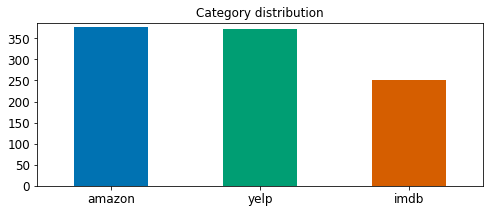

In [1202]:
print(X_sample.company_name.value_counts())

ub = max(X_sample.company_name.value_counts()) + 10
# plot barchart for X_sample
X_sample.company_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, ub], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

Ex.8 Below is a plot of a side by side comparison of the districution between our dataset.

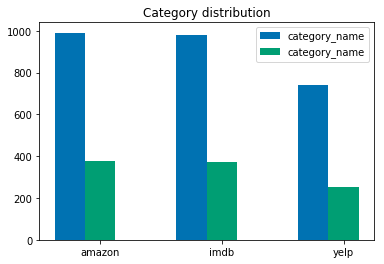

In [1203]:
#side by side comparison of the two graphs above

bar1 = df.company_name.value_counts()
bar2 = X_sample.company_name.value_counts()
index = np.arange(3)
    
plt.bar(index,bar1.tolist(), label='category_name', width=0.25)
plt.bar(index+0.25,bar2.tolist(), label='category_name', width=0.25)
plt.xticks(index+0.25,categories)
plt.title("Category distribution")
plt.legend()
plt.style.use('seaborn-colorblind')

plt.show()

Ex.9 Below I will build countVectorizer and analyzer then analyze the text in comment column.

In [1205]:
#generate documents term matrix table.
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df.comment)

In [1206]:
X_counts

<2711x5149 sparse matrix of type '<class 'numpy.int64'>'
	with 30117 stored elements in Compressed Sparse Row format>

In [1208]:
#analyze the first record of our df dataframe with the analyzer 
analyze(" ".join(list(df[:1].comment)))

['good', 'case', 'excellent', 'value']

In [1209]:
#Checking the shape of the document matrix
X_counts.shape

(2711, 5149)

In [1210]:
# To obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [1213]:
# to extract the first five articles and transform them into document-term matrix
df[0:5]

,comment,score,company_name
0,"Good case, Excellent value.",1,amazon
1,Great for the jawbone.,1,amazon
2,Tied to charger for conversations lasting more...,0,amazon
3,The mic is great.,1,amazon
4,I have to jiggle the plug to get it to line up...,0,amazon


Ex.10: Finding and verifying term which has 1 count int the first 5 records.

In [1214]:
# find the term that has 1 count value
arrayX = X_counts[0:5,0:100].toarray()

i=0 #row_counter
col_count = 0

for row in arrayX:
    i = 0
    for col in row:
        i=i+1
        if col == 1: 
            col_count = i

count_vect.get_feature_names()[col_count-1]

'45'

In [1220]:
#Use vectorizer to generate word frequency vector for new doc
#count_vect.transform(['Good and interesting products. Very good !.']).toarray()

In [1221]:
#put a 00 in the document to see if it is detected as we expect.
#count_vect.transform(['00 Something completely new.']).toarray()

In [1226]:
#looking at the first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [1227]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [1228]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

In [1229]:
plot_z = X_counts[0:20, 0:20].toarray()

In [1231]:
import seaborn as sns

Ex.11: Below I will plot the term-document matrix in a more efficient way.

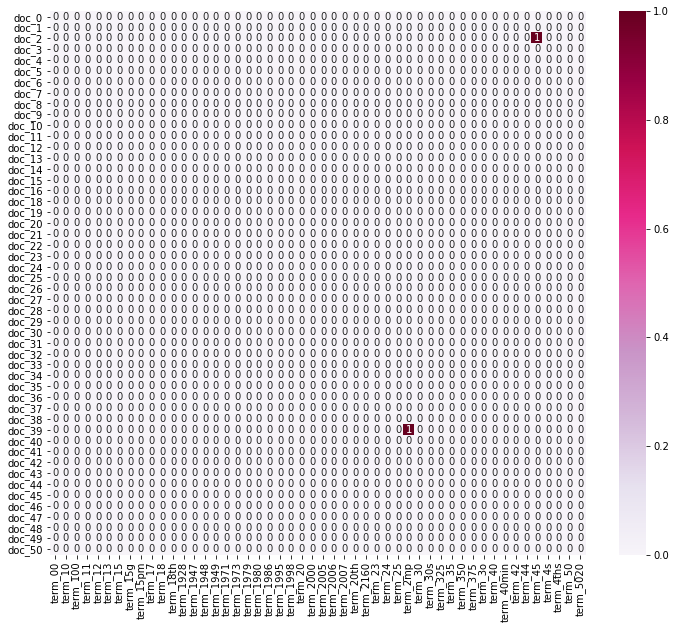

In [1232]:

plot_x2 = ["term_"+str(i2) for i2 in count_vect.get_feature_names()[0:50]]

# obtain document index
plot_y2 = ["doc_"+ str(i2) for i2 in list(df.index)[0:50]]

plot_z2 = X_counts[0:50, 0:50].toarray()

df_todraw2 = pd.DataFrame(plot_z2, columns = plot_x2, index = plot_y2)
plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df_todraw2,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)


Ex.12: Reduce the dimension to 3, and plot the 3-D plot. using 3 different angle.

In [1233]:
from sklearn.decomposition import PCA

In [1234]:
df_reduced.shape

(2711, 3)

In [1235]:
categories

['amazon', 'imdb', 'yelp']

In [1236]:
#Reducing dimension now to 3. and use the 3D plot to show visual
df_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

In [1237]:
df_reduced.shape

(2711, 3)

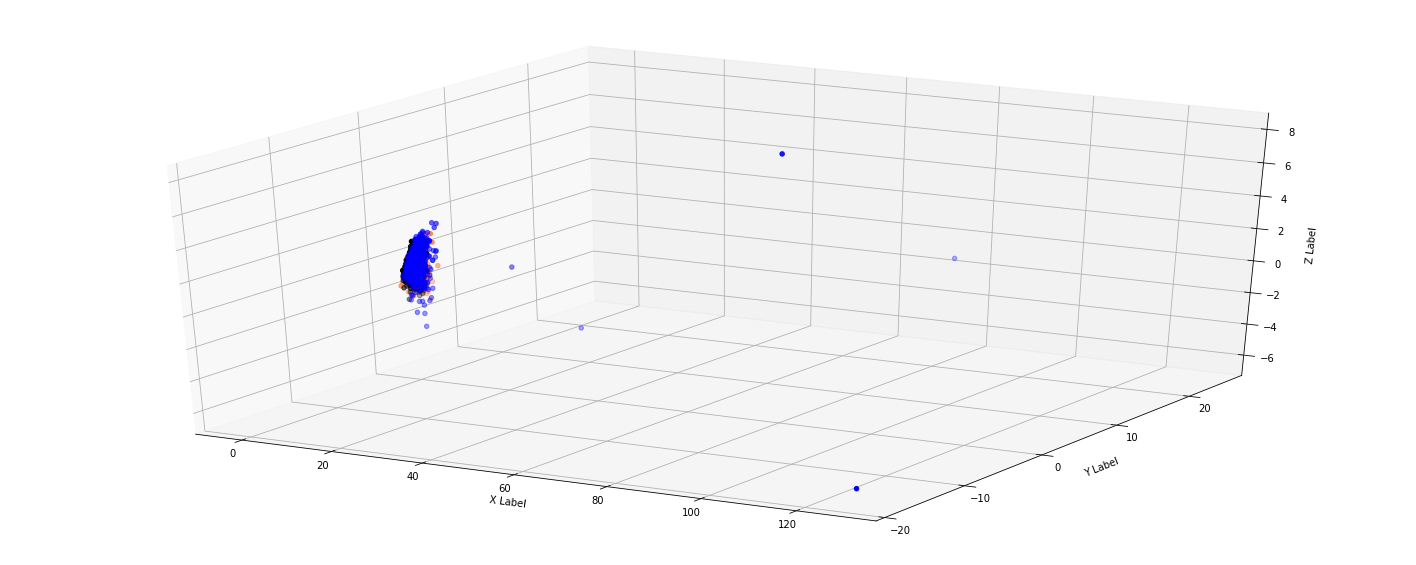

In [1238]:
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111, projection='3d')

n = 100

for c, company in zip(col, categories):
    xs = df_reduced[df['company_name'] == company].T[0]
    ys = df_reduced[df['company_name'] == company].T[1]
    zs = df_reduced[df['company_name'] == company].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

Ex.13: Below I will plot a chart using plotly to get a nice interactive visualization.

First, I will do attribute transformation/Aggregation to calculate the sum of terms below

In [1239]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [1240]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [1241]:
term_frequencies[5]

3

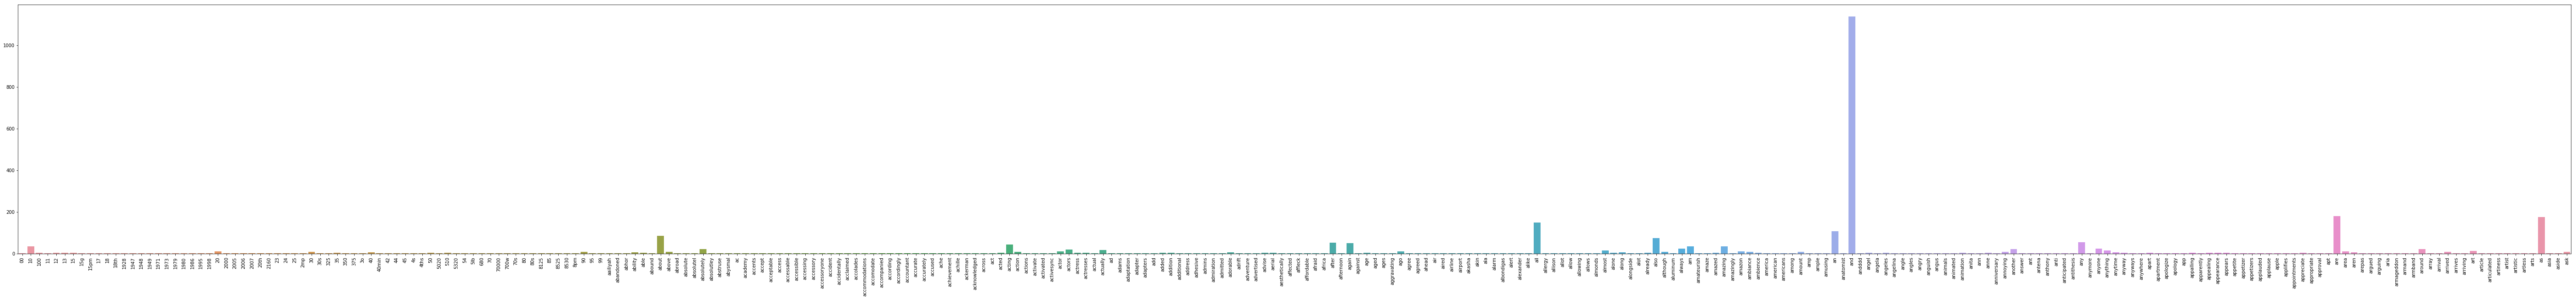

In [1242]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

Below is visual the representation of the sum of terms above using plotly graphing library.

In [1243]:

import plotly
plotly.tools.set_credentials_file(username='s107065436', api_key='081K4fVMroqL8xaVi4om')

import plotly.plotly as py2
import plotly.graph_objs as go

x_val = count_vect.get_feature_names()[:300]
y=term_frequencies[:300]


data = [go.Bar(
            x=np.arange(300),
            y=y
    )]

py2.iplot(data, filename='jupyter-basic_bar')


Ex.14: Below I will try to reduce the number of terms I want to visualize

In [1]:
# define my own algorithm to reduce/remove non importants word from term frequency matrix
reduce_termF = []
reduce_x=[]

for t in range(0,len(y)):
    if y[t] <= 10: # assuming that most meaningful and important words usually have frequency/count of less than  <= 10
        reduce_x.append(x_val[t])
        reduce_termF.append(y[t])     

NameError: name 'y' is not defined

In [1245]:
#plot the graph of the new reduce term_matrix.
data = [go.Bar(
            x=np.arange(t),
            y=reduce_termF,
            #mode = 'lines+markers',
            #name = 'lines+markers'
    )]

py2.iplot(data, filename='jupyter-basic_bar')

Ex.15: Now I will try to sort the reduce matrix above and plot it again to produce a more log shape graph

In [1246]:
#sort the reduced list and then plot it on a line filled graph

# combine flat first list to 2D list
x_list=list(zip(reduce_x, reduce_termF))
x_list[:5]

[('00', 1), ('100', 3), ('11', 2), ('12', 4), ('13', 3)]

In [1247]:
# sort 2D-list (term matrix)  by Frequency
x_list.sort(key=lambda x: x[1], reverse=True)
x_list[:5]

[('actor', 10), ('area', 10), ('20', 9), ('ago', 9), ('amazon', 9)]

First convert the list to dataframe before we plot it on graph.

In [1250]:
#plot a sorted list by frequency graph

xy_val=np.array(x_list)


data = [go.Scatter(
            x=np.arange(len(x_val)),
            y=xy_val[:,1].tolist(), #extract the 2nd column from 
            mode = 'lines',
            name = 'lines',
            fill='tonexty'
    )]



py2.iplot(data, filename='jupyter-basic_bar')

Ex.16: I will then try to generate the binarization using the company_name column.

In [1251]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [1252]:
mlb = preprocessing.LabelBinarizer()

In [1253]:
mlb.fit(df.company_name)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [1254]:
mlb.classes_

array(['amazon', 'imdb', 'yelp'], dtype='<U6')

In [1255]:
df[0:9]

,comment,score,company_name
0,"Good case, Excellent value.",1,amazon
1,Great for the jawbone.,1,amazon
2,Tied to charger for conversations lasting more...,0,amazon
3,The mic is great.,1,amazon
4,I have to jiggle the plug to get it to line up...,0,amazon
5,If you have several dozen or several hundred c...,0,amazon
6,If you are Razr owner...you must have this!,1,amazon
7,"Needless to say, I wasted my money.",0,amazon
8,What a waste of money and time!.,0,amazon


# Aparts from applying lab operations, other additional parts start below

Below is my attempt to generate TF-IDF features from the tokens of each text 

In [1256]:
#TFIDF vectorization start here
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False,
         use_idf=True)

In [1257]:
tfidf = transformer.fit_transform(X_counts)
tfidf

<2711x5149 sparse matrix of type '<class 'numpy.float64'>'
	with 30117 stored elements in Compressed Sparse Row format>

In [1258]:
tfidf[0:5,0:50].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0. 

In [1259]:
tfidf.shape

(2711, 5149)

Below is my attempt to calculate the similarity between random sentences using cosine similarity method and afew other approaches.

In [1260]:
#calculate cosine similarity.

#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Below, the first document/record of tfidf term matrix is compared with the first 50 document in the term matrix 
print ("cosine scores ==> ",cosine_similarity(tfidf[0:1], tfidf[0:50]))

cosine scores ==>  [[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.12954077 0.         0.         0.         0.11629972 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.18754478 0.         0.         0.         0.         0.
  0.25383156 0.         0.         0.         0.24710166 0.
  0.         0.0728956 ]]


In [1261]:
# Below, I pick any two random document/record from the term matrix and compare their similarity using cosine approach
import random

rand1 = random.randint(1,2711)
rand2 = random.randint(1,2711)

cos_sim = cosine_similarity(tfidf[rand1:rand1+1], tfidf[rand2:rand2+1])

print("Document",rand1)
print("Document",rand2)
print("There cosine similarity of the two document above is ", cos_sim )


Document 257
Document 627
There cosine similarity of the two document above is  [[0.]]


Lastly, below is my attempt to implement a simple Naive Bayes classifier that automatically classifies the records into their categories.

In [1262]:
X_counts[0:50,0:50].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [1263]:
#from sklearn.datasets import make_classification

#nb_samples = 300
#X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0)

In [1264]:
# Building a classifier using BernoulliNB naive bayes method
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

x = df[0:]["comment"]
y = df[0:]["score"]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25)


In [1265]:
X_countsVec_train = count_vect.fit_transform(X_train)
Y_train_int = Y_train.astype(int)

In [1266]:
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_countsVec_train, Y_train_int)
bnb.score(X_countsVec_train, Y_train_int)

0.9458927693064437

In [1267]:
X_countVect_test = count_vect.transform(X_test)
y_pred = bnb.predict(X_countVect_test)

In [1268]:
from sklearn.model_selection import cross_val_score

cross_val_score(bnb, X_countsVec_train, Y_train_int, scoring='accuracy', cv=990).mean()

0.7952020202020202

In [1269]:
from sklearn.metrics import accuracy_score

y_expect = Y_test


print (accuracy_score(y_expect, y_pred))

0.8289085545722714


Below is another approach to build a classifier using MultinomialNB

In [1270]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_countsVec_train, Y_train_int)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [1271]:
y_pred2 = mnb.predict(X_countVect_test)

In [1272]:
print (accuracy_score(y_expect, y_pred2))

0.8067846607669616


Below I will attempt to perform Multinomial prediction using the ifidf vectorizer values

In [1273]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVec = TfidfVectorizer(min_df=1,stop_words='english')

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x, y, test_size=0.25)

In [1274]:
X_train_tfidf = tfidfVec.fit_transform(X_train2)
#Y_train_tfidf = tfidfVec.fit_transform(Y_train2)
Y_train_int = Y_train2.astype('int')

X_test_tfidf = tfidfVec.transform(X_test2)
actual = np.array(Y_test2)

In [1276]:
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, Y_train_int)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [1277]:
y_pred2a = mnb.predict(X_test_tfidf)

In [1278]:
y_pred2a

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,

In [1279]:
actual

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,

In [1280]:
cross_val_score(mnb, X_test_tfidf, actual, scoring='accuracy', cv=300).mean()

0.7647222222222223

In [1281]:
print (accuracy_score(actual, y_pred2a))

0.8171091445427728
